In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sbn

In [44]:
warnings.filterwarnings("ignore")

In [45]:
column_names=["user_id", "movie_id", "rating", "time_stamp"]
df = pd.read_csv("./ml-1m/ml-1m/ratings.dat",sep='::',names=column_names)


In [46]:
df.groupby("movie_id").mean().sort_values("rating", ascending=False)
df.shape

(1000209, 4)

In [93]:
movies= pd.read_csv("./ml-1m/ml-1m/movies.dat", sep='::', names=["movie_id", "movie_name", "genre"])
movies["movie_name"]= movies["movie_name"].apply(lambda movie: movie[:-7])
# for (movie) in movies["movie_name"]:
#     movies["movie_name"][index]=movie[:-7]
#     print movie
movies.head(5)

,movie_id,movie_name,genre
0,1,Toy Story,Animation|Children's|Comedy
1,2,Jumanji,Adventure|Children's|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama
4,5,Father of the Bride Part II,Comedy


In [94]:
merged_df=df.merge(movies,on="movie_id")
merged_df.head()

,user_id,movie_id,rating,time_stamp,movie_name,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest,Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest,Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest,Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest,Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest,Drama


In [95]:
merged_df.drop(["time_stamp", "genre"],axis=1, inplace=True)

In [96]:
merged_df.groupby("movie_id").mean()["rating"]

movie_id
1       4.146846
2       3.201141
3       3.016736
4       2.729412
5       3.006757
6       3.878723
7       3.410480
8       3.014706
9       2.656863
10      3.540541
11      3.793804
12      2.362500
13      3.262626
14      3.542484
15      2.458904
16      3.793255
17      4.027545
18      3.337580
19      2.480720
20      2.537500
21      3.623894
22      3.349206
23      2.857143
24      3.179487
25      3.651020
26      3.530000
27      2.934426
28      4.055866
29      4.062035
30      3.648649
          ...   
3923    2.576923
3924    2.923077
3925    3.854839
3926    3.361111
3927    3.580460
3928    3.441748
3929    3.993197
3930    3.255605
3931    2.037037
3932    3.750000
3933    2.250000
3934    3.035714
3935    3.000000
3936    3.723214
3937    2.940741
3938    1.925926
3939    1.961538
3940    1.733333
3941    2.045455
3942    1.785714
3943    3.052083
3944    2.111111
3945    1.488372
3946    2.260000
3947    3.472727
3948    3.635731
3949    4.115132
3950 

In [97]:
new_df= pd.DataFrame(merged_df.groupby("movie_name").mean()["rating"])
new_df["num_of_rating"] = merged_df.groupby("movie_name").count()["rating"]
print new_df.shape

(3664, 2)


In [98]:

new_df.sort_values("num_of_rating",ascending=False)

,rating,num_of_rating
movie_name,,
American Beauty,4.317386,3428
Star Wars: Episode IV - A New Hope,4.453694,2991
Star Wars: Episode V - The Empire Strikes Back,4.292977,2990
Star Wars: Episode VI - Return of the Jedi,4.022893,2883
Jurassic Park,3.763847,2672
Saving Private Ryan,4.337354,2653
Terminator 2: Judgment Day,4.058513,2649
"Matrix, The",4.315830,2590
Back to the Future,3.990321,2583


In [148]:
 plt.hist(new_df["num_of_rating"], bins=100)


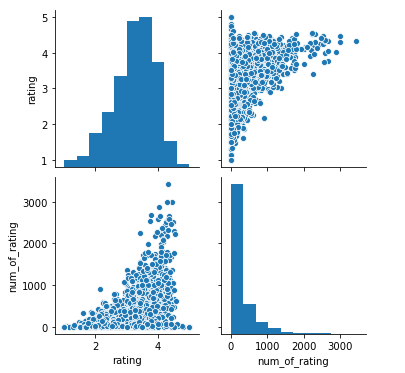

In [100]:
sbn.pairplot(new_df)

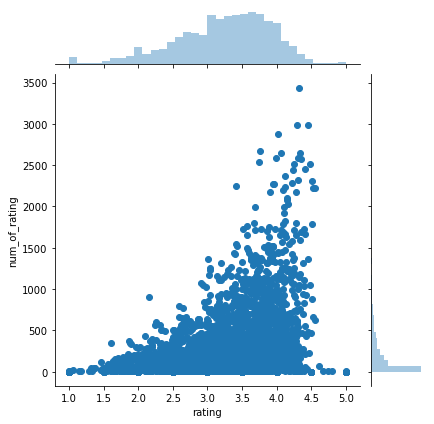

In [101]:
sbn.jointplot(x= new_df["rating"], y="num_of_rating", data= new_df, kind="scatter")

In [102]:
movie_table= pd.pivot_table?

In [ ]:
movie_table= pd.pivot_table

In [103]:
movie_table= pd.pivot_table

In [145]:
movie_table= pd.pivot_table(data= merged_df, index="user_id", columns="movie_name", values="rating")


In [146]:
# print movie_table["Jumanji"].sort_values(ascending=False)

In [147]:
jumanji_rating = movie_table.corrwith(movie_table["Titanic"])
jumanji_rating.dropna(inplace=True)
jumanji_df= pd.DataFrame(jumanji_rating, columns=["correlation"])
jumanji_df= jumanji_df.join(new_df, on="movie_name")


In [144]:
jumanji_df[jumanji_df["num_of_rating"]>100].sort_values("correlation", ascending=False).head()

,correlation,rating,num_of_rating
movie_name,,,
Titanic,1.000000,3.567139,1765
"Flintstones in Viva Rock Vegas, The",0.511438,1.804688,128
"Run Silent, Run Deep",0.500977,4.000000,220
"Bodyguard, The",0.500371,2.859425,626
How Green Was My Valley,0.476476,4.028037,107


In [152]:
def getPrediction(name):
    column_names=["user_id", "movie_id", "rating", "time_stamp"]
    df = pd.read_csv("./ml-1m/ml-1m/ratings.dat",sep='::',names=column_names)
    movies= pd.read_csv("./ml-1m/ml-1m/movies.dat", sep='::', names=["movie_id", "movie_name", "genre"])
    movies["movie_name"]= movies["movie_name"].apply(lambda movie: movie[:-7])
    merged_df=df.merge(movies,on="movie_id")
    merged_df.drop(["time_stamp", "genre"],axis=1, inplace=True)
    new_df= pd.DataFrame(merged_df.groupby("movie_name").mean()["rating"])
    new_df["num_of_rating"] = merged_df.groupby("movie_name").count()["rating"]
    movie_table= pd.pivot_table(data= merged_df, index="user_id", columns="movie_name", values="rating")
    jumanji_rating = movie_table.corrwith(movie_table[name])
    jumanji_rating.dropna(inplace=True)
    jumanji_df= pd.DataFrame(jumanji_rating, columns=["correlation"])
    jumanji_df= jumanji_df.join(new_df, on="movie_name")
    return jumanji_df[jumanji_df["num_of_rating"]>100].sort_values("correlation", ascending=False).head()
    

In [154]:
print getPrediction("Hell")

KeyError: 'Hell'